In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')

In [70]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
23126,0.957913,-0.742977,0.044705,0.670307,1.070422,-1.049090,-1.000477,-0.556297,0.757866,-1.007506,0
183006,-1.099543,0.117558,0.044705,0.119618,1.070422,0.755505,-1.000477,2.315756,-1.151073,0.511160,0
150589,0.012467,-0.014832,0.044705,-0.667081,-0.982998,0.755505,1.051748,0.308445,0.796045,0.768354,0
158123,0.957913,-0.875367,0.044705,-1.611120,1.070422,-1.049090,-1.000477,-1.511190,0.757866,1.319483,0
119826,0.957913,-1.140147,0.044705,1.850356,-0.982998,-1.049090,1.051748,-0.385363,-0.005409,0.596891,0


In [71]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
46992,0.957913,-1.007757,0.044705,-1.925800,-0.982998,-1.049090,1.051748,0.715644,0.757866,-0.064463,0
27370,0.957913,0.978093,0.044705,0.119618,-0.982998,0.755505,1.051748,3.029818,-1.647398,-1.362678,0
35921,0.957913,-0.213417,0.044705,-1.296441,-0.982998,0.755505,1.051748,-0.428565,0.757866,-0.860539,0
38856,0.957913,0.713313,0.044705,-0.667081,-0.982998,0.755505,-1.000477,-0.395783,-1.647398,-0.419635,0
27028,0.957913,-0.081027,0.044705,1.142327,1.070422,0.755505,-1.000477,-3.726433,0.757866,-0.713571,0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

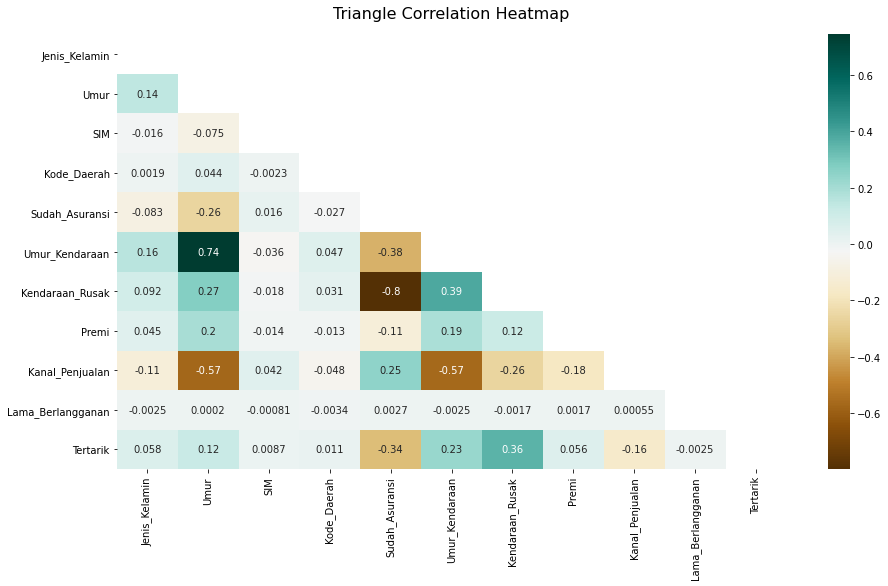

In [72]:
plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)

0    202945
1     27686
Name: Tertarik, dtype: int64


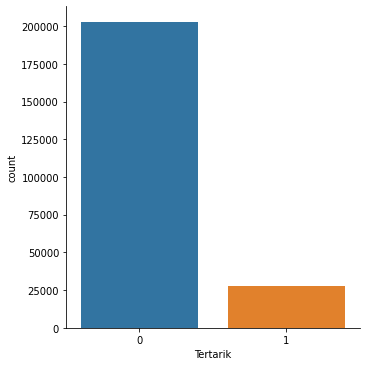

In [73]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [74]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (184504, 10)
x_test shape: (46127, 10)
---------------------------------
y_train shape: (184504,)
y_test shape: (46127,)


## **Tuning Model**

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [77]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=2000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
]


In [78]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [79]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 82.86
Akurasi model Logistic Regression: 88.04
Akurasi model Gradient Boosting: 88.02
Akurasi model AdaBoost: 88.01
Akurasi model Random Forest: 87.25


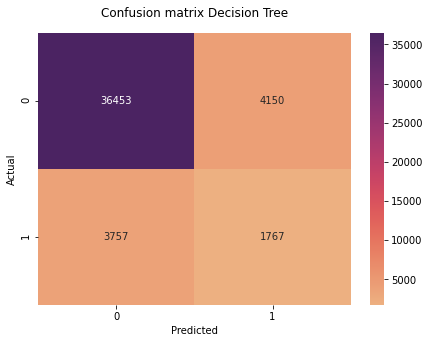


               precision    recall  f1-score   support

           0       0.91      0.90      0.90     40603
           1       0.30      0.32      0.31      5524

    accuracy                           0.83     46127
   macro avg       0.60      0.61      0.61     46127
weighted avg       0.83      0.83      0.83     46127




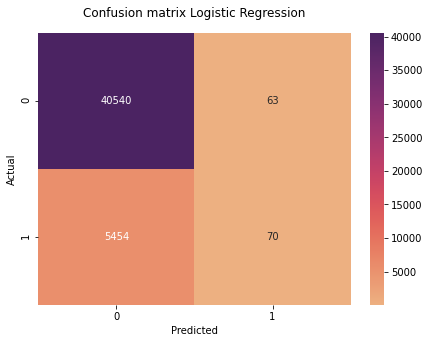


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40603
           1       0.53      0.01      0.02      5524

    accuracy                           0.88     46127
   macro avg       0.70      0.51      0.48     46127
weighted avg       0.84      0.88      0.83     46127




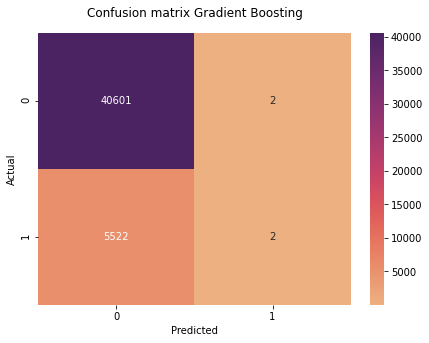


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40603
           1       0.50      0.00      0.00      5524

    accuracy                           0.88     46127
   macro avg       0.69      0.50      0.47     46127
weighted avg       0.83      0.88      0.82     46127




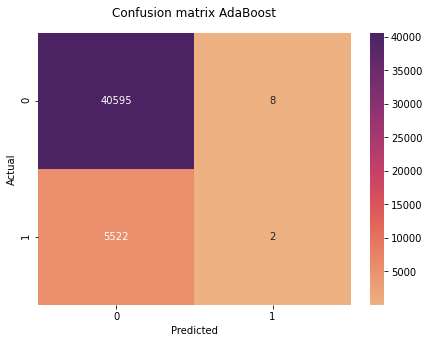


               precision    recall  f1-score   support

           0       0.88      1.00      0.94     40603
           1       0.20      0.00      0.00      5524

    accuracy                           0.88     46127
   macro avg       0.54      0.50      0.47     46127
weighted avg       0.80      0.88      0.82     46127




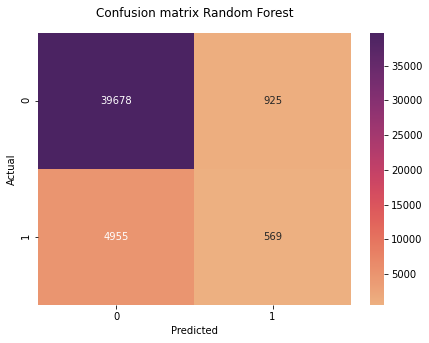


               precision    recall  f1-score   support

           0       0.89      0.98      0.93     40603
           1       0.38      0.10      0.16      5524

    accuracy                           0.87     46127
   macro avg       0.63      0.54      0.55     46127
weighted avg       0.83      0.87      0.84     46127




In [80]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

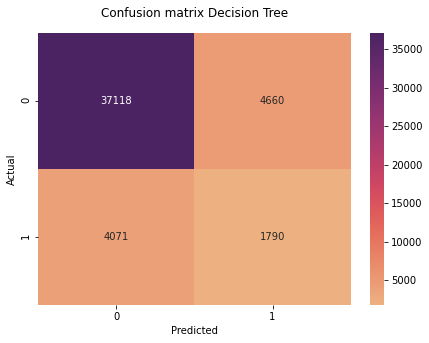


               precision    recall  f1-score   support

           0       0.90      0.89      0.89     41778
           1       0.28      0.31      0.29      5861

    accuracy                           0.82     47639
   macro avg       0.59      0.60      0.59     47639
weighted avg       0.82      0.82      0.82     47639




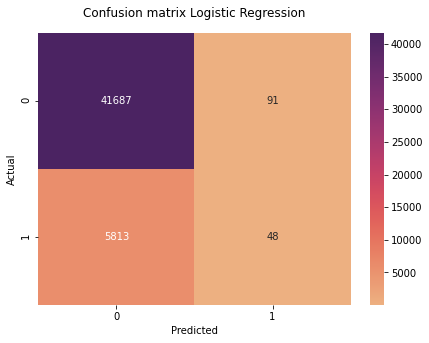


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.35      0.01      0.02      5861

    accuracy                           0.88     47639
   macro avg       0.61      0.50      0.47     47639
weighted avg       0.81      0.88      0.82     47639




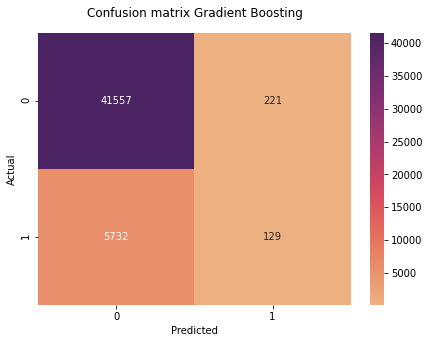


               precision    recall  f1-score   support

           0       0.88      0.99      0.93     41778
           1       0.37      0.02      0.04      5861

    accuracy                           0.88     47639
   macro avg       0.62      0.51      0.49     47639
weighted avg       0.82      0.88      0.82     47639




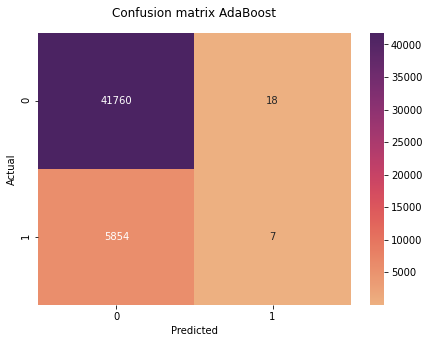


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.28      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.58      0.50      0.47     47639
weighted avg       0.80      0.88      0.82     47639




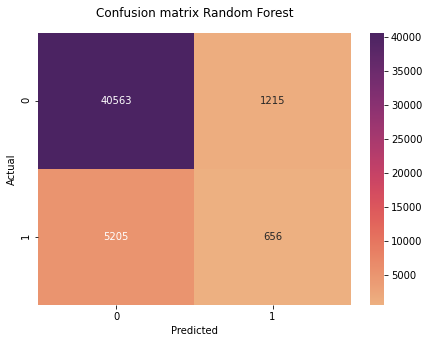


               precision    recall  f1-score   support

           0       0.89      0.97      0.93     41778
           1       0.35      0.11      0.17      5861

    accuracy                           0.87     47639
   macro avg       0.62      0.54      0.55     47639
weighted avg       0.82      0.87      0.83     47639




In [81]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
